# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №3. Библиотеки Pandas и Matplotlib

Задание выполнил(а): Чиркова Юлия

### Общая информация

__Дата выдачи:__ 16.11.2022

__Дедлайн:__ 04:00 27.11.2022

### Оценивание и штрафы

Каждая задача оценивается в 3 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{pandas}} \times 10/48 ,
$$

где $s_{\text{pandas}}$  — количество баллов, которое вы набрали в сумме по задачам.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

**Важно:** В этом домашнем задании предусмотрено несколько заданий, за которые можно получить бонусные баллы. Бонусные баллы прибавляются к обычным баллам, и может выйти так, что ваша итоговая оценка станет больше 10. В таком случае именно это и будет являться вашей оценкой. То есть за это ДЗ **можно** получить больше 10

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотекой pandas и matplotlib!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Обратите внимание, что практически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, существенная часть баллов будет выставляться именно за выводы, так как в анализе данных они имеют большое значение. Таким образом, на любое задание, сформулированное в виде вопроса, отвечайте текстом, подкрепляя ваши слова написанным и выполненным кодом. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*.

При решении задач, когда вам необходимо сделать какой-то фильтр, срез, выборку, или иное действие с данными, запрещается использовать циклы (`for`, `while`) и оператор `if`.

Также в некоторых заданиях от вас будет требоваться построить графики. Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей. Пожалуйста, не пренебрегайте оформлением, поскольку в этом ДЗ это тоже оценивается.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()` и другие*

In [2]:
df = pd.DataFrame([[1, "A"], [2, "B"], [3, "C"]], columns = ["col1", "col2"])

### 1

In [7]:
print(df[df.col1>2])

   col1 col2
2     3    C


In [11]:
df = pd.DataFrame([[1, "A", 1.1], [2, "B", 1.4], [3, "C", 1.9]], columns = ["col1", "col2", "col3"])

In [12]:
for row in df.itertuples():
    print(row.col1, end = ' ')

1 2 3 

В этом домашнем задании вы поработаете с данными о пассажирах с затонувшего «Титаника», которые мы уже раннее кратко рассматривали на лекции. 

Описание данных, а также сами данные (откуда их следует скачать) находятся по следующей ссылке:

https://www.kaggle.com/c/titanic/data

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [2]:
data = pd.read_csv('train.csv', delimiter=',')
data.shape

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

Первые 5 строк

In [ ]:
data.head()

Последние 5 строк

In [3]:
data.tail()

NameError: name 'data' is not defined

### 2

Для каждого признака в рассматриваемых данных укажите тип этого признака

*Подсказка. Лекция 3 вам поможет!*

1. PassengerId - категориальный, потому что порядок не важен
2. Survived (Выжил ли) - бинарный признак, поскольку есть два результата : да и нет (1 и 0 соответственно)
3. Pclass (класс каюты) - порядковый признак, есть иерахрхия от 1 до 3 класса
4. Name (имя) - категориальный (тк имена могут же и совпадать, но нет их иерархии)
5. Sex (пол) - в данной задаче бинарный, а так категориальный...
6. Age (возраст) - вещественный (задает число возраст)
7. SibSp (кол-во братьев/сестер и мужей/жен) - вещественный, задает количество
8. Parch (кол-во родителей и детей) - вещественный, задает кол-во
9. Ticket (номер билета) - категориальный
10. Fare - вещественный, тк задает характеристику - стоимость билета и может быть любым числом, нет принадлежности какому-либо множеству
11. Cabin (номер кабины) - категориальный (несколько человек могли жить в одной кабине, есть корелляция между кабинами и людьми в них)
12. Embarked - категориальный, есть классификация по выезду из какого-либо порта, но порты между собой не ранжируются

### 3

Придумайте три какие-нибудь задачи анализа данных, которые можно было бы решать для данного датасета:

1. Задачу регрессии - то есть иными словами предсказания некоего целочисленного результата для каждого объекта
2. Задачу классификации - то есть иными словами отнесения каждого объекта к какому-то одному из двух или более заранее заданных классов (групп)
3. Задачу кластеризации - то есть иными словами разделения всех объектов на неизвестное заранее количество групп по принципу их похожести друг на друга

*Подробнее вы можете прочитать про то, что представляют собой задачи регрессии, классификации, кластеризации, например, в Википедии. Также простым языком и на конкретном примере это расписано, например, вот в этой [статье](https://habr.com/ru/company/simbirsoft/blog/565396/) (в начале)*

1. Задача регрессии: Предсказать стоимость билета на основании порта выезда и класса билета.
2. Задача классификации: На основании, выжил ли человек и стоимости его поездки, отнести его билет к определенному классу или же наоборот, на основании пола, типа билета определить, выжил ли человек.
3. Задача кластеризации: На основании данных о кол-ве родственников на борту, их выживаемости, класса билета, имени, а также номера каюты выделить семьи или родственников. 

### 4

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [44]:
data[data['Survived'] == 1]['Survived'].shape[0] / data['Survived'].shape[0]

0.3838383838383838

In [45]:
survived = data[data['Survived'] == 1]
male_percent = data[(data['Survived'] == 1) & (data['Sex'] == "male")].shape[0] / survived.shape[0]
female_percent = data[(data['Survived'] == 1) & (data['Sex'] == "female")].shape[0] / survived.shape[0]
male_percent, female_percent

(0.31871345029239767, 0.6812865497076024)

### 5

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [46]:
first = data[data['Pclass'] == 1].shape[0]
second = data[data['Pclass'] == 2].shape[0]
third = data[data['Pclass'] == 3].shape[0]
first, second, third

(216, 184, 491)

Можно было проще, но нет...

In [47]:
data[data['Pclass'] == data['Pclass'].max()]['Sex'].max()

'male'

### 6

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки. Что можно сказать на основе результатов, которые вы получаете?

In [48]:
min_cost = data['Fare'].min()
average_cost = data['Fare'].mean()
max_cost = data['Fare'].max()
min_cost, average_cost, max_cost

(0.0, 32.2042079685746, 512.3292)

In [49]:
min_s = data[data['Embarked'] == 'S']['Fare'].min()
average_s = data[data['Embarked'] == 'S']['Fare'].mean()
max_s = data[data['Embarked'] == 'S']['Fare'].max()
min_s, average_s, max_s

data[data['Embarked'] == 'S']['Fare'].describe()[['min', 'mean', 'max']]

min       0.000000
mean     27.079812
max     263.000000
Name: Fare, dtype: float64

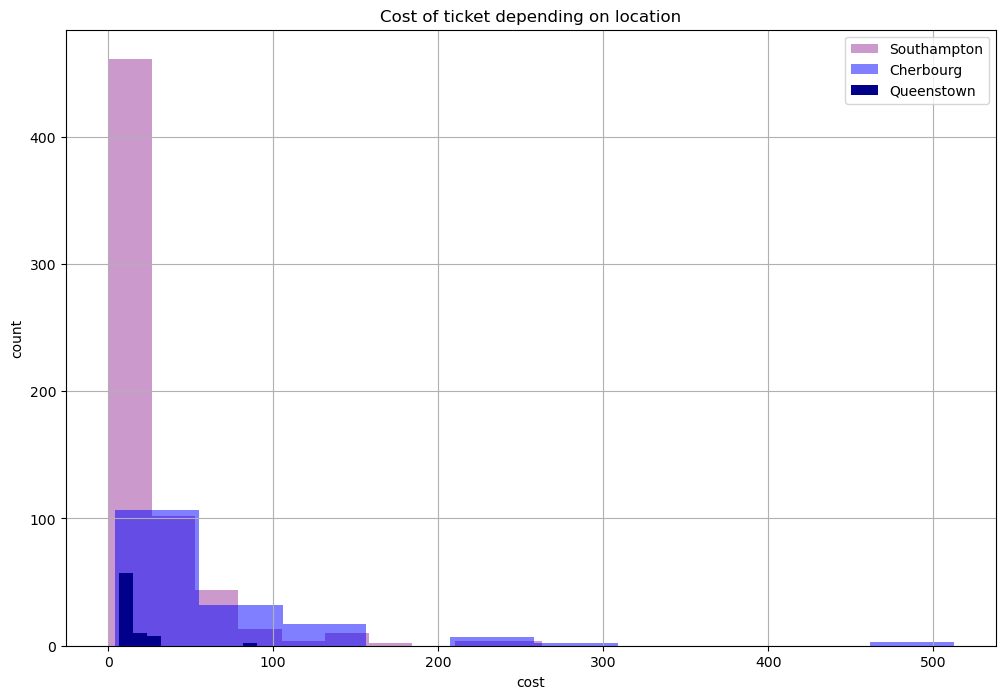

In [50]:
plt.figure(figsize=(12,8))
plt.title('Cost of ticket depending on location')
data[data['Embarked'] == 'S']['Fare'].hist(color='purple',label='Southampton', alpha=.4)
data[data['Embarked'] == 'C']['Fare'].hist(color='blue', label='Cherbourg', alpha=.5)
data[data['Embarked'] == 'Q']['Fare'].hist(color='darkblue', label='Queenstown',)
plt.xlabel('cost')
plt.ylabel('count')
plt.legend()
plt.show()

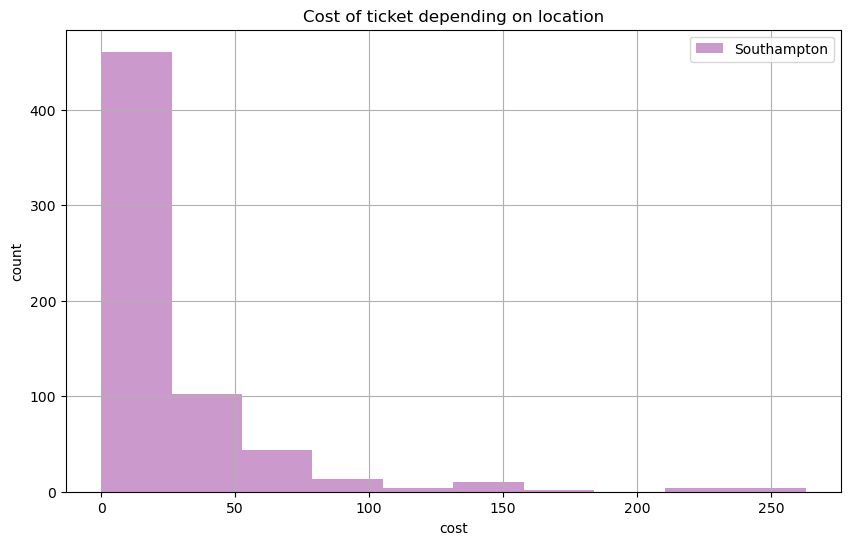

In [51]:
plt.figure(figsize=(10,6))
plt.title('Cost of ticket depending on location')
data[data['Embarked'] == 'S']['Fare'].hist(color='purple',label='Southampton', alpha=.4)
plt.xlabel('cost')
plt.ylabel('count')
plt.legend()
plt.show()

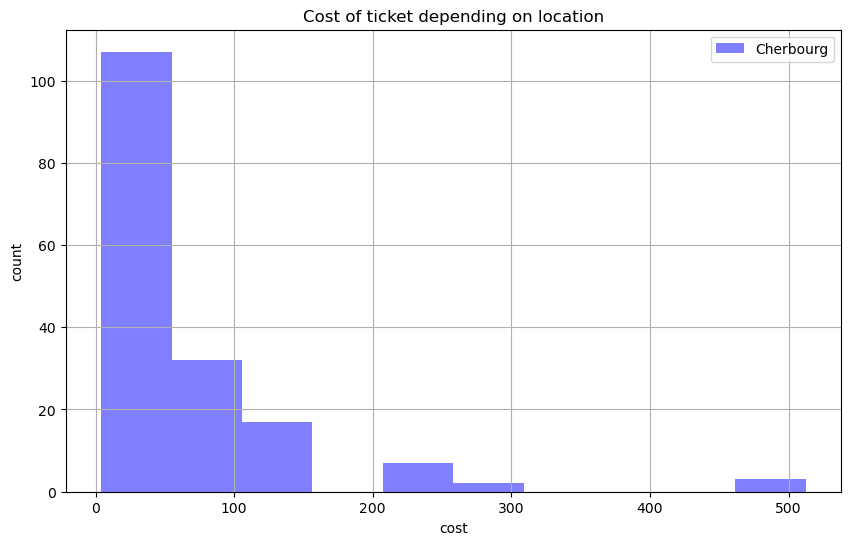

In [52]:
plt.figure(figsize=(10,6))
plt.title('Cost of ticket depending on location')
data[data['Embarked'] == 'C']['Fare'].hist(color='blue', label='Cherbourg', alpha=.5)
plt.xlabel('cost')
plt.ylabel('count')
plt.legend()
plt.show()

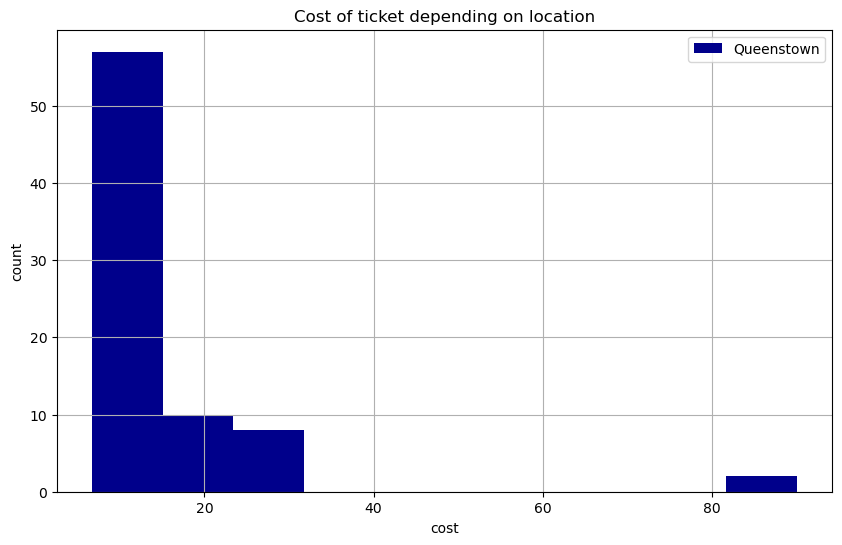

In [53]:
plt.figure(figsize=(10,6))
plt.title('Cost of ticket depending on location')
data[data['Embarked'] == 'Q']['Fare'].hist(color='darkblue', label='Queenstown',)
plt.xlabel('cost')
plt.ylabel('count')
plt.legend()
plt.show()

Самые дорогие билеты были проданы для тех, кто садился в Шербурге(более 500). Средние по стоимости - в основном в Шербурге и 
Саутгемптоне. В Квинстауне были проданы билеты со стоимостью до 100 и их было меньше, чем в других городах. 
В Саутгемптоне было продано больше всего самых дешевых билетов и только там зашли люди с нулевой стоимостью билета. 
В Шербурге также было продано больше дешевых билетов,чем дорогих в этом же городе. (макс стоимость около 500)


### 7

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов. Свой выбор аргументируйте

1. Столбец с Id пассажира (PassengerID), тк номер строки в таблице дублирует эту информацию.
2. Столбец с номером кабины (тк по сути нельзя распределить номер кабины относительно класса и у нас нет карты расположения корабля, + в них много пропусков :)) я знаю, что это дальше, но правда слишком много)


In [54]:
data['Cabin'].isnull().sum()

687

In [55]:
cabins_class = data[data['Pclass'] == 3]['Cabin']

cabins_class.unique()

array([nan, 'G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38'],
      dtype=object)

In [56]:
cabins_class = data[data['Pclass'] == 2]['Cabin']

cabins_class.unique()

array([nan, 'D56', 'F33', 'E101', 'F2', 'F4', 'D', 'E77'], dtype=object)

In [57]:
datadr = data.drop(columns=['PassengerId', 'Cabin'])

### 8

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [58]:
datadr.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked     True
dtype: bool

Пропуски есть в столбцах возраста, кабины и места посадки.

In [59]:
datadr.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

### 9

In [60]:
datadr.loc[(datadr['Pclass'] == 1), 'Age'] = datadr[datadr['Pclass'] == 1]['Age'].fillna(value=datadr[datadr['Pclass'] == 1]['Age'].mean())

In [61]:
datadr.loc[(datadr['Pclass'] == 2), 'Age'] = datadr[datadr['Pclass'] == 2]['Age'].fillna(value=datadr[datadr['Pclass'] == 2]['Age'].mean())

In [62]:
datadr.loc[(datadr['Pclass'] == 3), 'Age'] = datadr[datadr['Pclass'] == 3]['Age'].fillna(value=datadr[datadr['Pclass'] == 3]['Age'].mean())

Добавила средние значения возраста по каждому из классов, тк если смотреть по выживаемости, то затрагиваем важную информацию и мешаем дальнейшей проверке выживаемости.

Для заполнения пропусков в месте посадки погуглила этих людей, потому что мало ли информация уже есть... Оказалось, что есть :)))
https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html зашла в Саутгемптоне
https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html неудивительно, но тоже там...

In [63]:
datadr[datadr.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [64]:
datadr.loc[data['Pclass'] == 1, 'Embarked'] = datadr['Embarked'].fillna('S')
datadr.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked    False
dtype: bool

### 10

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)). Какие выводы можно сделать?

In [65]:
datadr.Fare.corr(datadr.Age)

0.12088640560693405

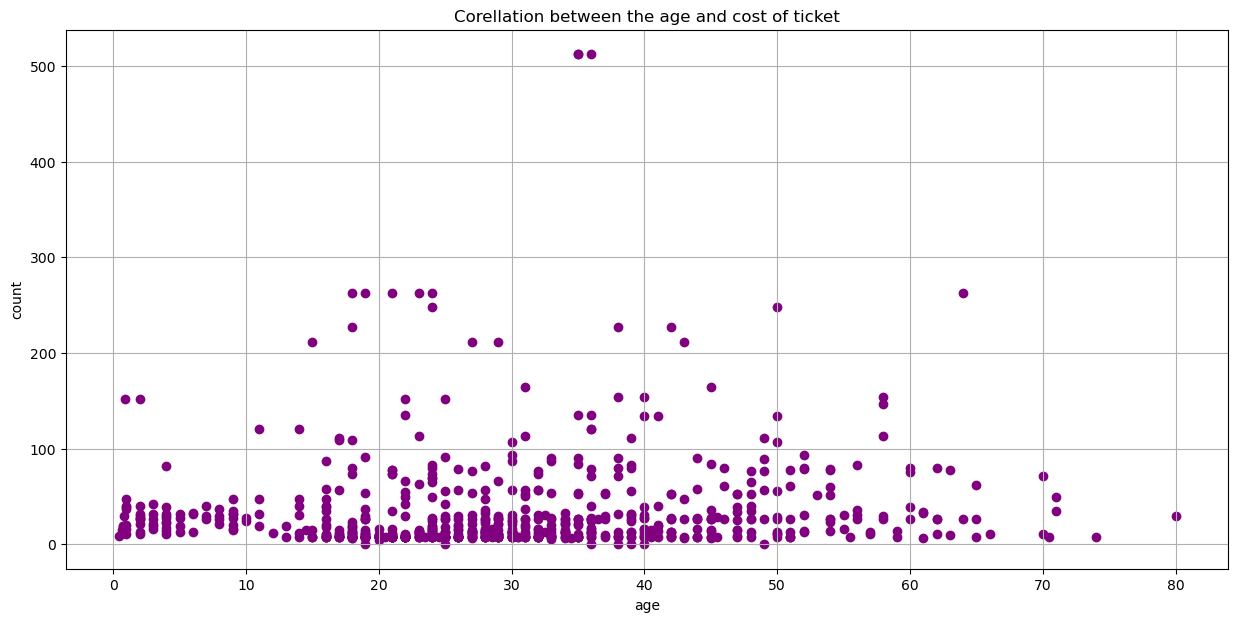

In [66]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.title('Corellation between the age and cost of ticket')
plt.scatter(data['Age'],data['Fare'], color='purple')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Корелляция близка к 0 (примерно 0,12), поэтому скорее независимые величины. Диаграмма рассеяния напоминает нормальное распределение, но можно сделать предположение, что для детей до примерно 16 лет(в основном для них) и пенсионеров (от 60) билеты были со скидкой или льготой, так как их стоимость в основном была ниже 100.

### 11

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса? Свой ответ аргументируйте!

In [67]:
datadr.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Средняя стоимость билета для выживших больше, чем для невыживших, так что можно сделать вывод, что да, чаще выживали люди с более дорогими билетами

In [68]:
datadr[datadr['Survived'] == 1].groupby('Pclass')['Survived'].count()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [69]:
datadr[datadr['Survived'] == 0].groupby('Pclass')['Survived'].count()

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [70]:
datadr.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Если смотреть только на количество выжившиз людей, то в 3-м классе выжило больше, чем во втором. Однако в самом низшем классе самая высокая смертность. Посчитав среднее кол-во выживших людей в каждом из классов, можно прийти к выводу, что около 63% людей из 1 класса выжили, около 47% из 2 и 24% из 3, что говорит о том, что спастись самым богатым пассажирам было проще.

Люди, которые являются родственниками вероятнее всего вместе выжили или не выжили, жили в одной каюте и имели билеты одного класса, можно изучить, какой процент выживаемости был в семьях

### 12

In [71]:
datadr['Family'] = datadr['Parch'] + datadr['SibSp'] + 1
datadr.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных, а также отличный способ улучшить качество ваших выводов из проделанного анализа в целом! Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Чем может быть полезен такой признак?

### 13

Теперь придумайте свой признак, который может быть полезен для анализа (несет в себе какую-то информацию), и добавьте его в таблицу. Обязательно аргументируйте, чем полезен ваш признак.

Создадим бинарный признак, отвечающий за то, ехал ли человек один или с родственниками. (1 - если один, 0 - если нет). С помощью него можно узнать, влияет ли наличие сопутсвующих на выживаемость.

In [72]:
datadr['Alone'] = datadr[datadr['Family'] == 1]['Family'] + 0
datadr['Alone'].fillna(0, inplace=True)
datadr.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,2,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,2,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,1,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,2,0.0
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,1,1.0
5,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q,1,1.0
6,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S,1,1.0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S,5,0.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S,3,0.0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C,2,0.0


### 14

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. 

Креативность в этом задании приветствуется, и за нее можно получить 1-2 бонусных балла!

*Подсказка. Например, какая фамилия была самой популярной на корабле? (Лучше не используйте этот пример, а придумайте что-то своё)*

Ничего умного не придумала, поэтому посмотрела процент выживаемости у людей, которые ехали в одиночку и нет по классам :)))


In [73]:
datadr[(datadr.Pclass == 3) & (datadr.Alone == 1)].Survived.mean()

0.21296296296296297

In [74]:
datadr[(datadr.Pclass == 3) & (datadr.Alone == 0)].Survived.mean()

0.2994011976047904

In [75]:
datadr[(datadr.Pclass == 2) & (datadr.Alone == 1)].Survived.mean()

0.34615384615384615

In [76]:
datadr[(datadr.Pclass == 2) & (datadr.Alone == 0)].Survived.mean()

0.6375

In [77]:
datadr[(datadr.Pclass == 1) & (datadr.Alone == 1)].Survived.mean()

0.5321100917431193

In [78]:
datadr[(datadr.Pclass == 1) & (datadr.Alone == 0)].Survived.mean()

0.7289719626168224

### 15

Постройте гистограммы распределения **вещественных** признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения анализа данных и с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация. Какие выводы можно сделать из проделанной работы? 

Глубина ответа на теоретические вопросы в этом задании приветствуется, и за нее можно получить 1-2 бонусных балла!

С самого начала добавим столбцы с нормализацией (поскольку для машинного обучения удобнее использовать данные в нормализованном виде) каждого из вещественных параметров: Age, Fare, SubSp, Parch, Family (последний признак также является вещественным, поскольку в соответствие каждому человеку ставится какое-то натуральное число). Построим распределение для каждого из признаков в стандартном виде и нормализованном. Для прризнаков, связанных с родственниками сделаем нормализацию от 0 до 1, тк разброс в значениях не такой большой, как у возраста и цены билета.

In [79]:
datadr['N_Age'] = (datadr.Age - datadr.Age.mean()) / datadr.Age.std()
datadr['N_Fare'] = (datadr.Fare - datadr.Fare.mean()) / datadr.Fare.std()
datadr['N_Parch'] = (datadr.Parch - datadr.Parch.min()) / (datadr.Parch.max() - datadr.Parch.min())
datadr['N_SibSp'] = (datadr.SibSp - datadr.SibSp.min()) / (datadr.SibSp.max() - datadr.SibSp.min())
datadr['N_Family'] = (datadr.Family - datadr.Family.min()) / (datadr.Family.max() - datadr.Family.min())

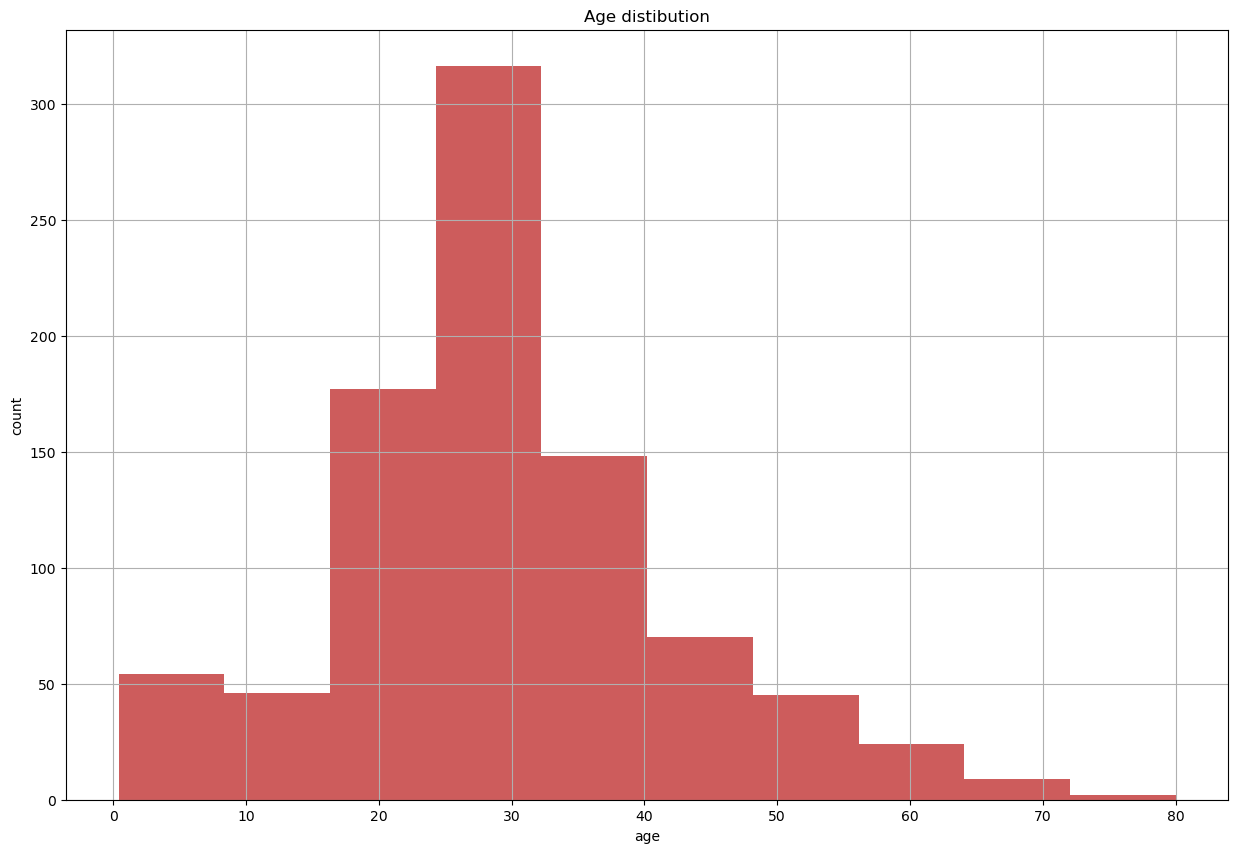

In [80]:
plt.figure(figsize=(15,10))
plt.title('Age distibution')
datadr['Age'].hist(color='indianred')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

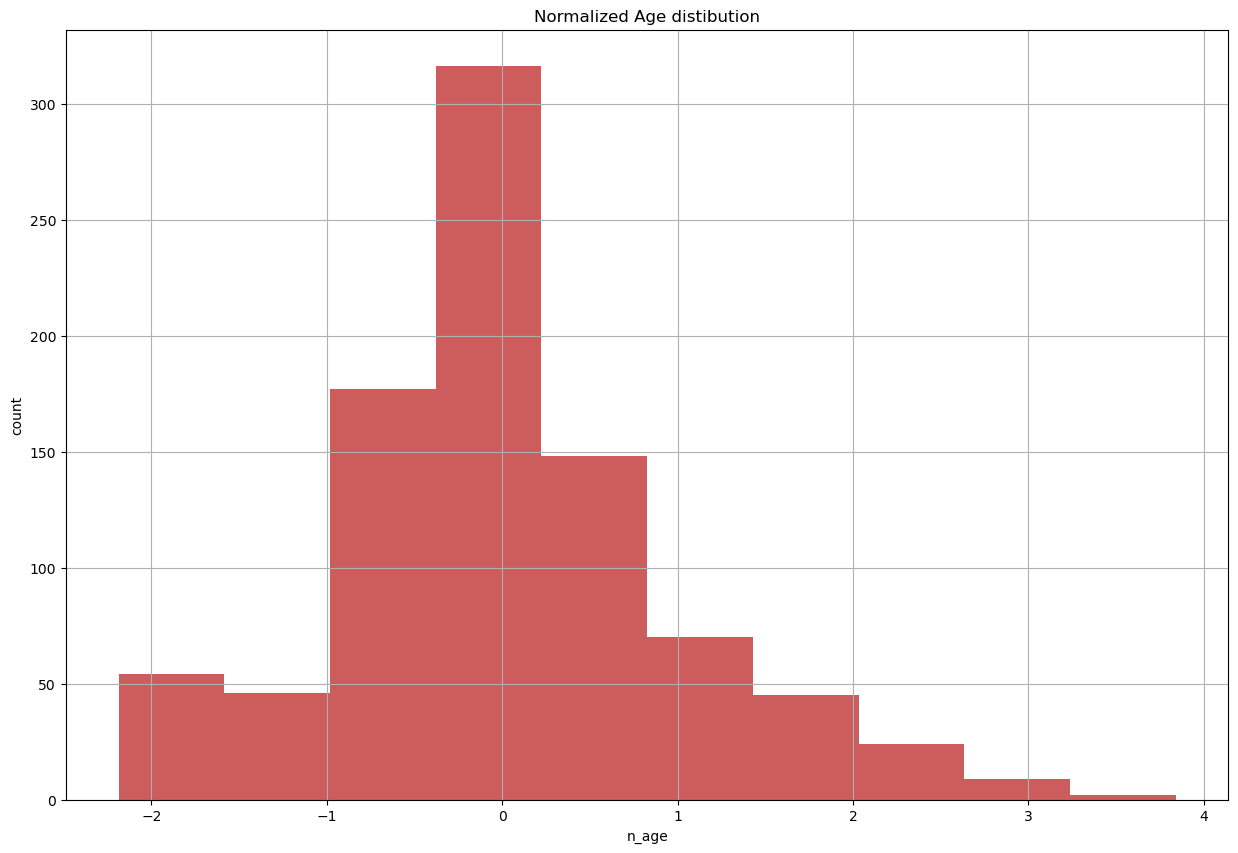

In [81]:
plt.figure(figsize=(15,10))
plt.title('Normalized Age distibution')
datadr.N_Age.hist(color='indianred')
plt.xlabel('n_age')
plt.ylabel('count')
plt.show()

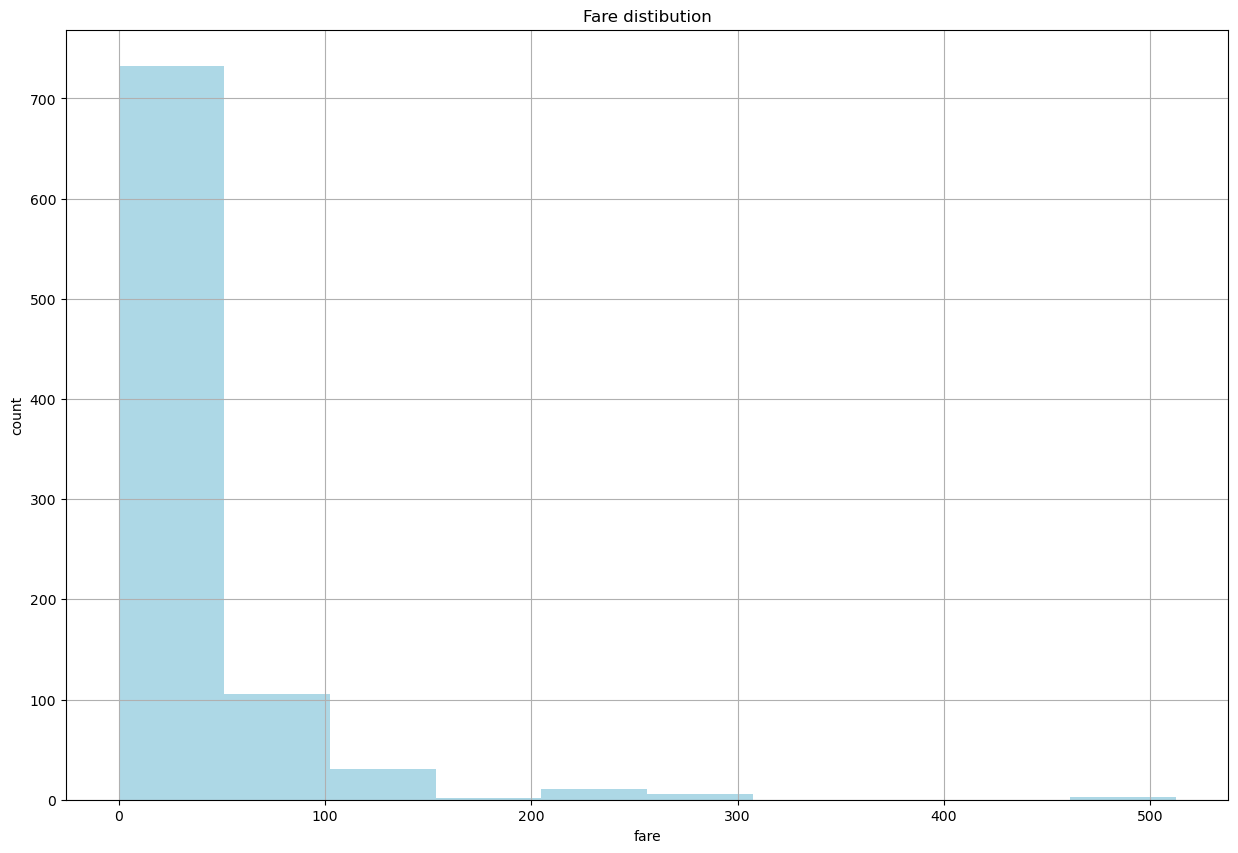

In [82]:
plt.figure(figsize=(15,10))
plt.title('Fare distibution')
datadr['Fare'].hist(color='lightblue')
plt.xlabel('fare')
plt.ylabel('count')
plt.show()

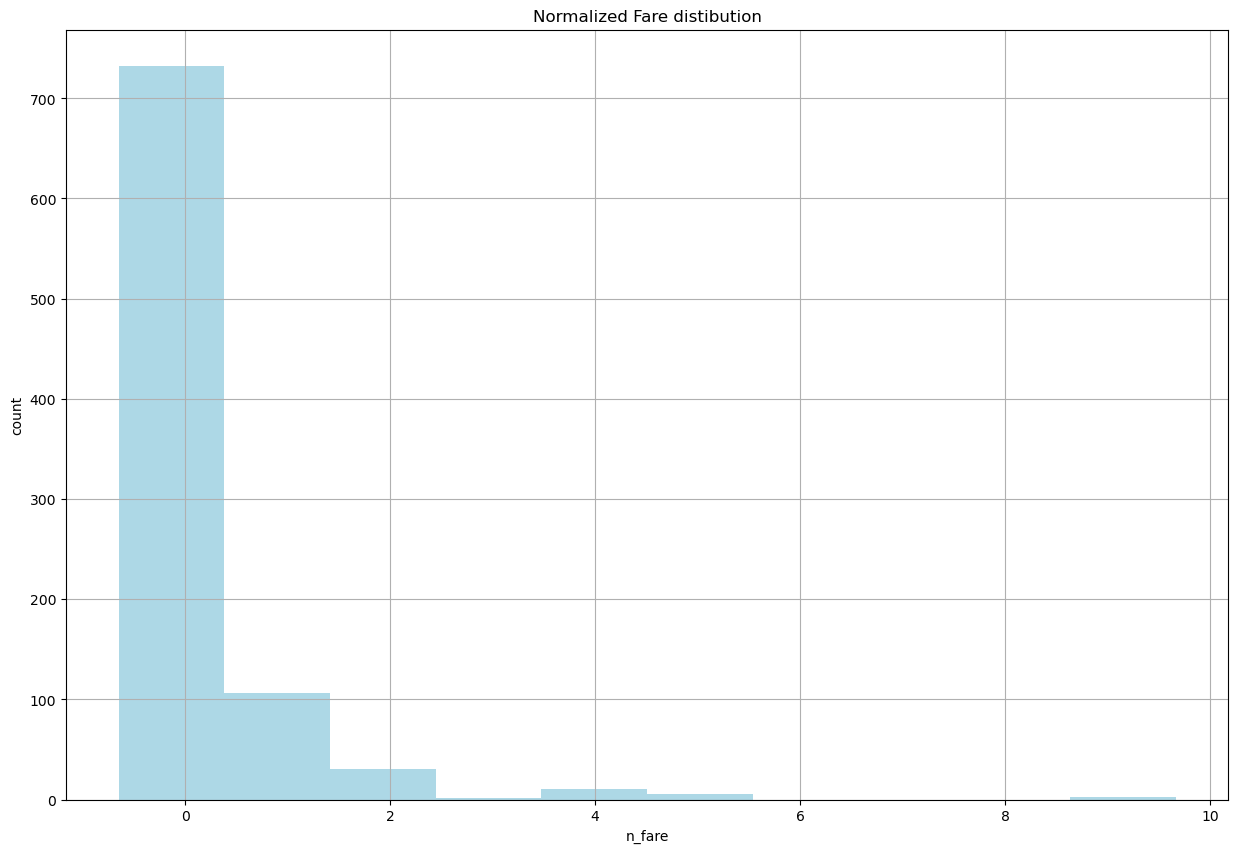

In [83]:
plt.figure(figsize=(15,10))
plt.title('Normalized Fare distibution')
datadr.N_Fare.hist(color='lightblue')
plt.xlabel('n_fare')
plt.ylabel('count')
plt.show()

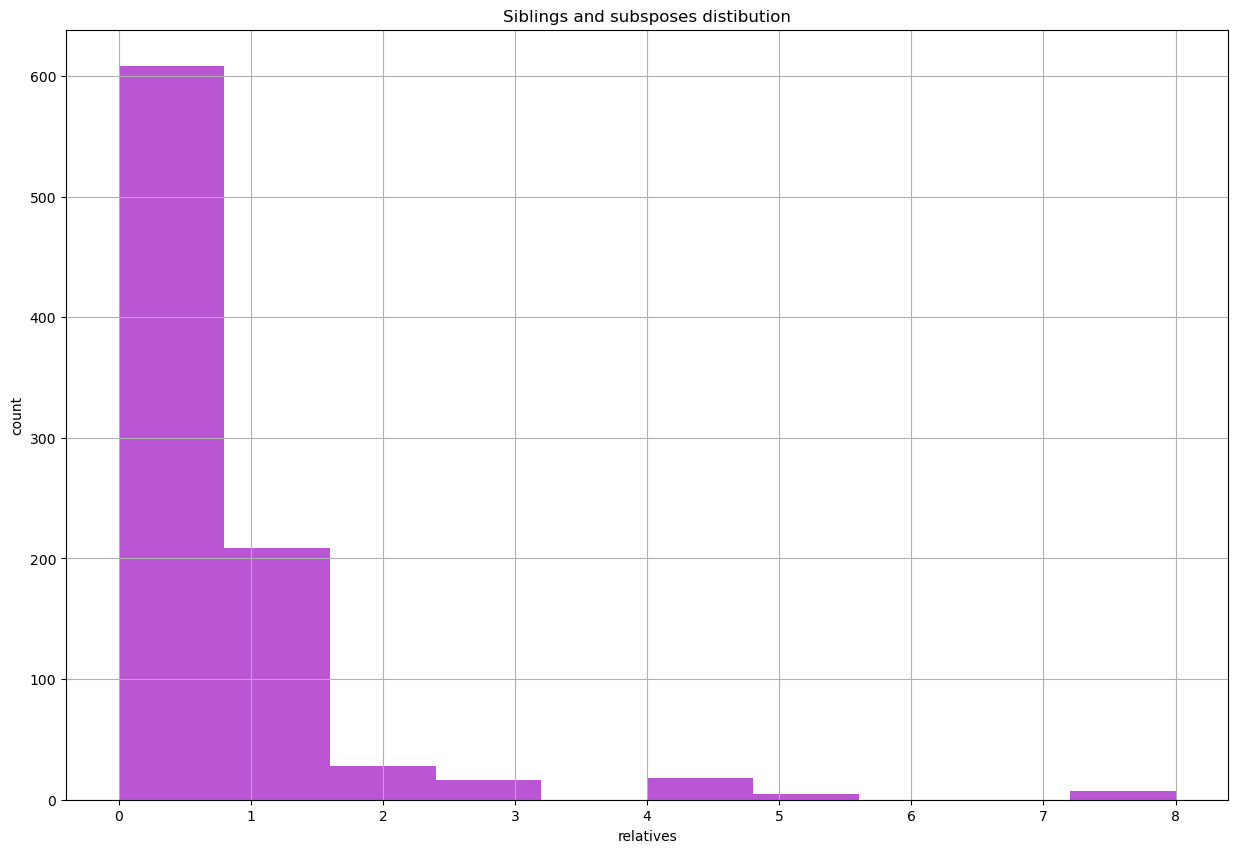

In [84]:
plt.figure(figsize=(15,10))
plt.title('Siblings and subsposes distibution')
datadr['SibSp'].hist(color='mediumorchid')
plt.xlabel('relatives')
plt.ylabel('count')
plt.show()

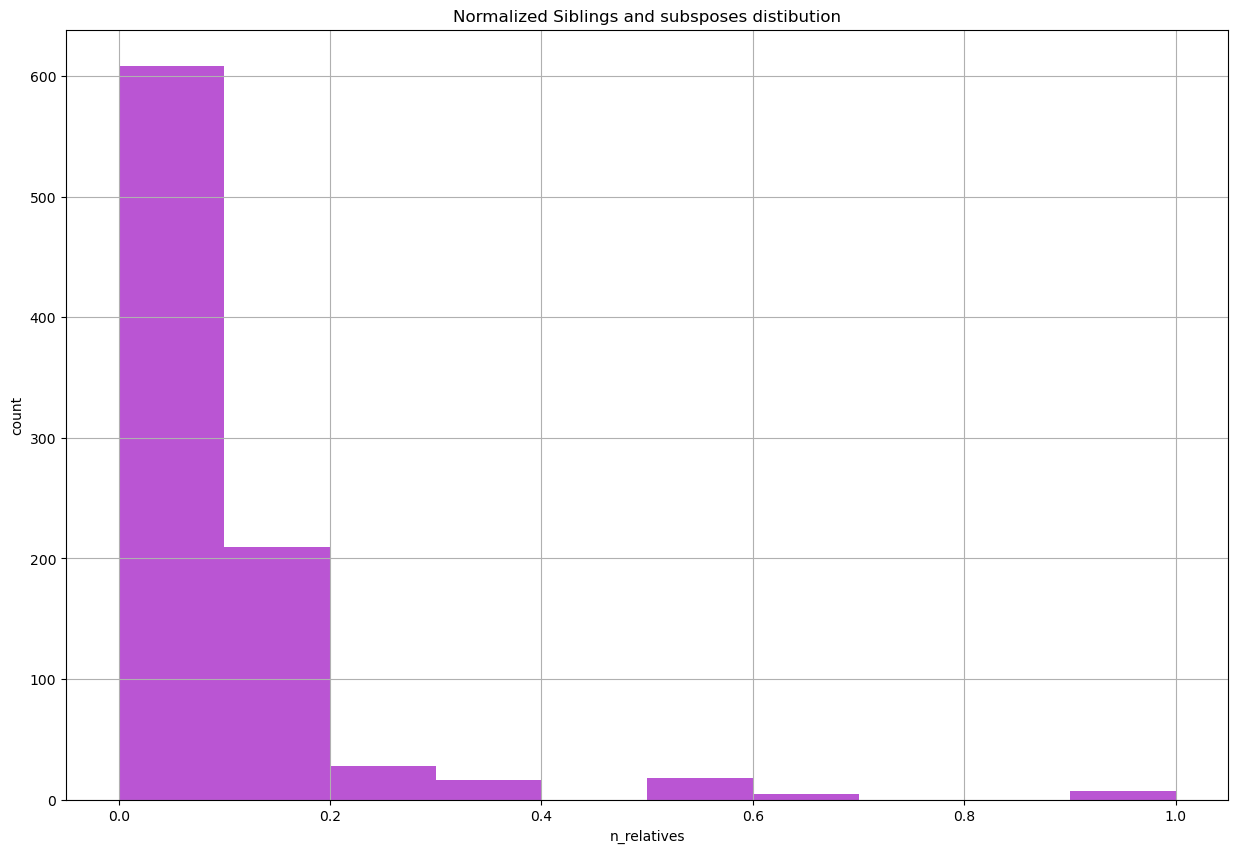

In [85]:
plt.figure(figsize=(15,10))
plt.title('Normalized Siblings and subsposes distibution')
datadr.N_SibSp.hist(color='mediumorchid')
plt.xlabel('n_relatives')
plt.ylabel('count')
plt.show()

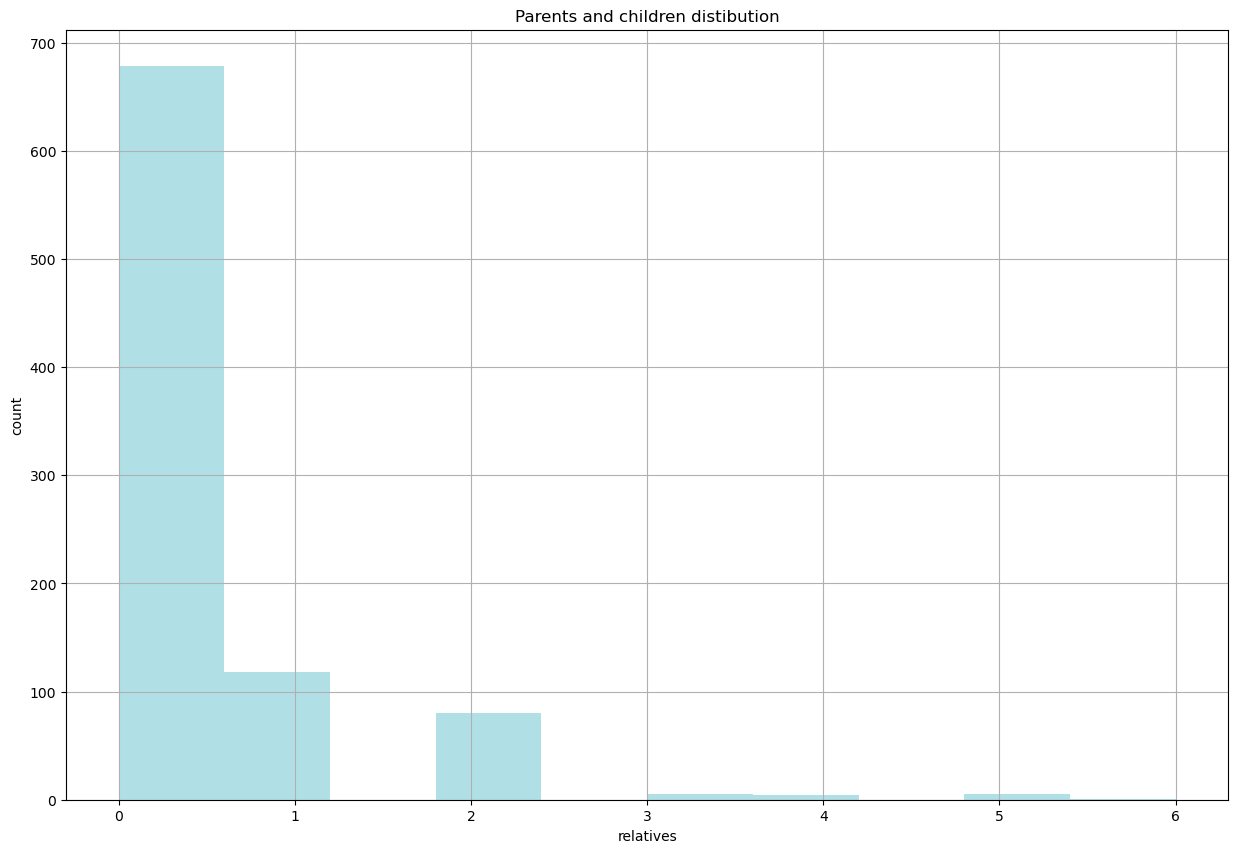

In [86]:
plt.figure(figsize=(15,10))
plt.title('Parents and children distibution')
datadr['Parch'].hist(color='powderblue')
plt.xlabel('relatives')
plt.ylabel('count')
plt.show()

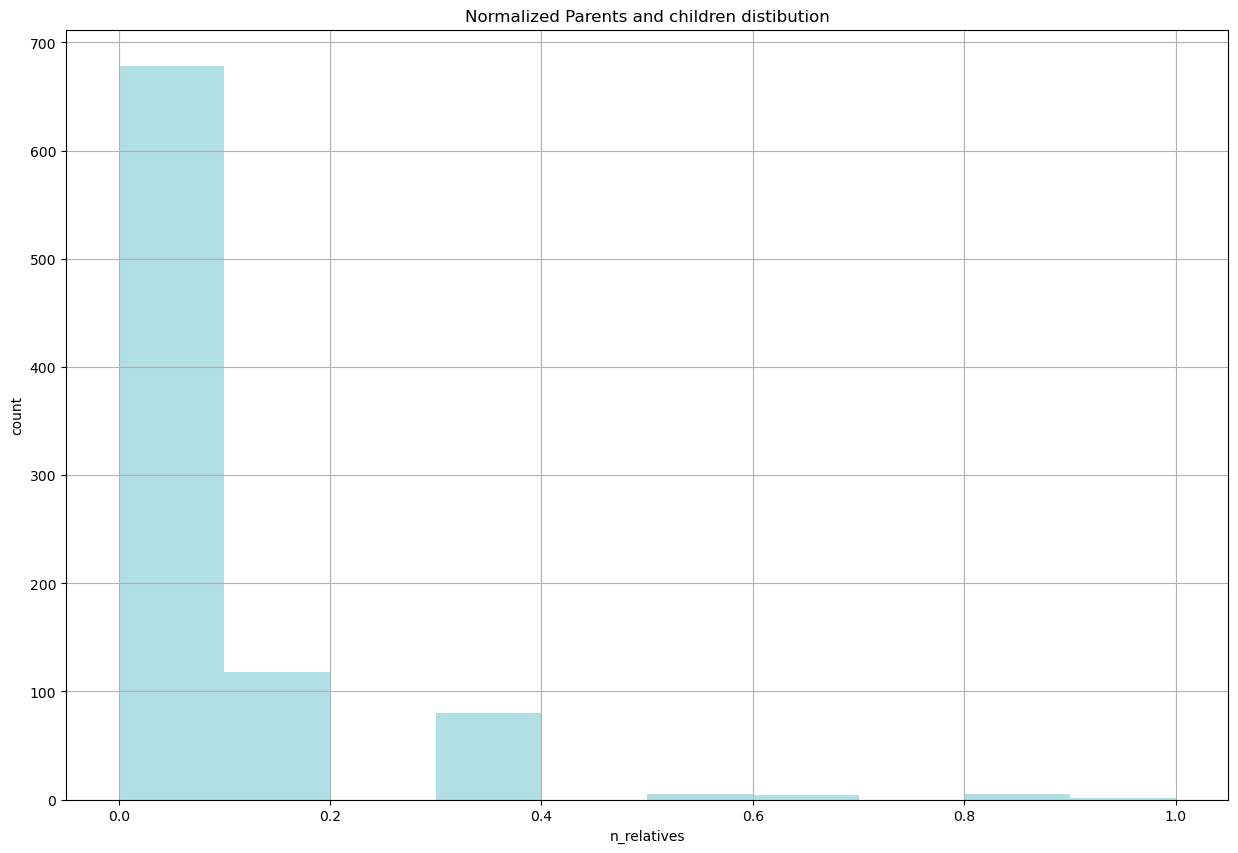

In [87]:
plt.figure(figsize=(15,10))
plt.title('Normalized Parents and children distibution')
datadr.N_Parch.hist(color='powderblue')
plt.xlabel('n_relatives')
plt.ylabel('count')
plt.show()

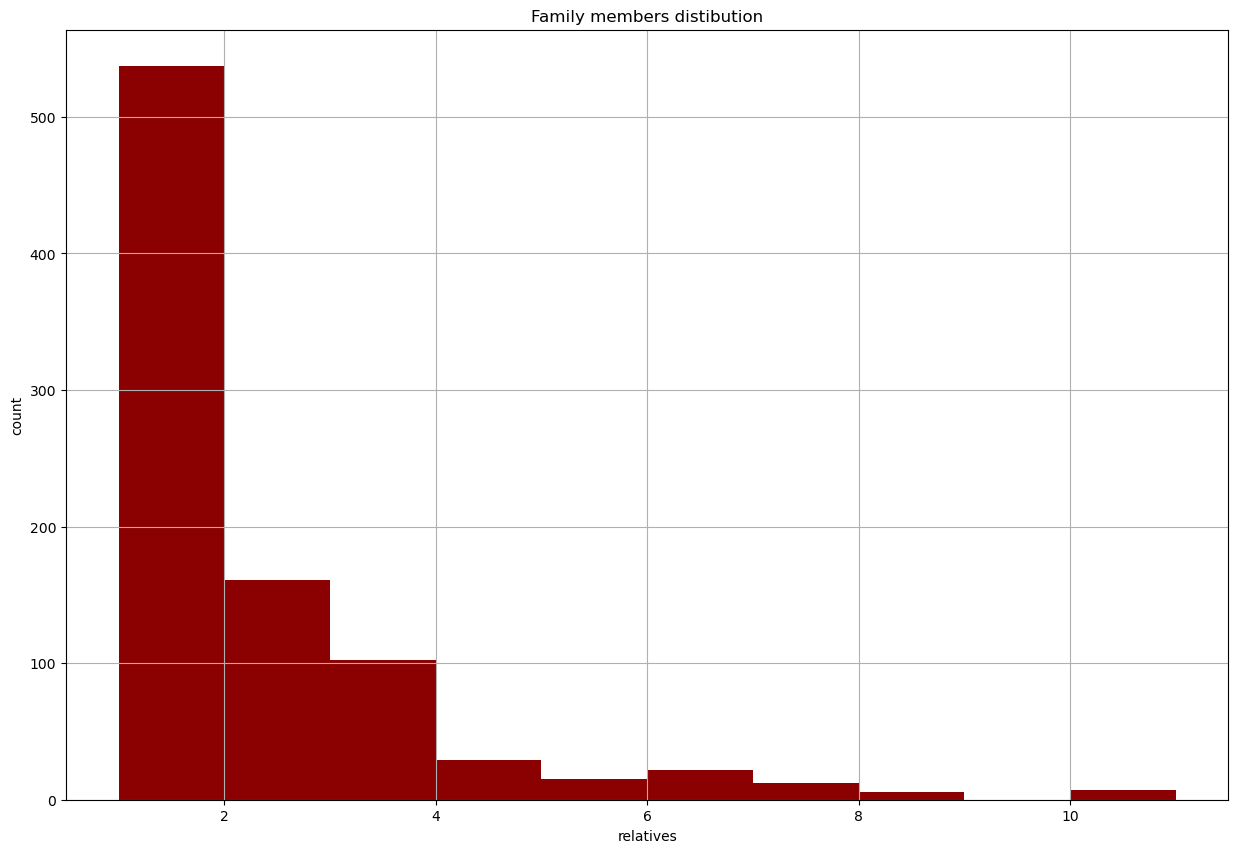

In [88]:
plt.figure(figsize=(15,10))
plt.title('Family members distibution')
datadr['Family'].hist(color='darkred')
plt.xlabel('relatives')
plt.ylabel('count')
plt.show()

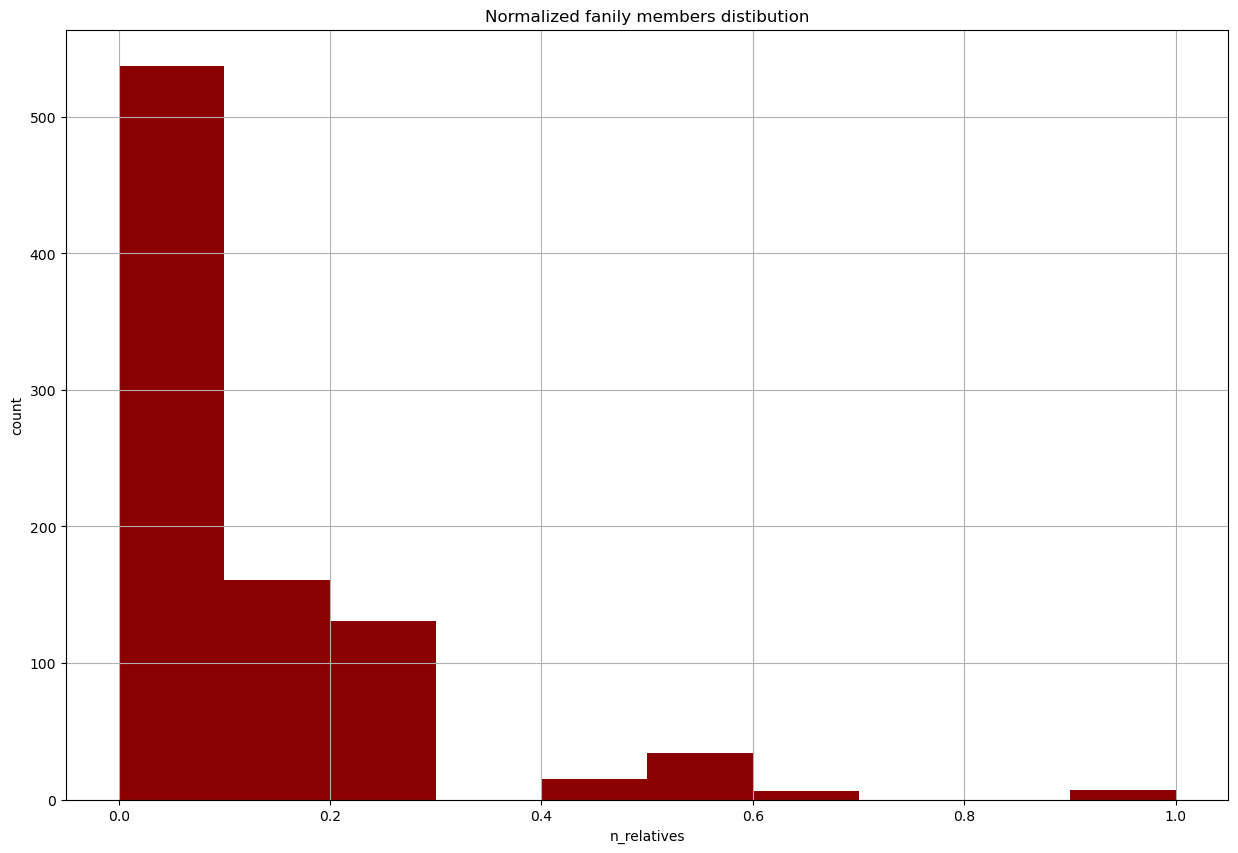

In [89]:
plt.figure(figsize=(15,10))
plt.title('Normalized fanily members distibution')
datadr.N_Family.hist(color='darkred')
plt.xlabel('n_relatives')
plt.ylabel('count')
plt.show()

Если смотреть на гистограммы, построенные по исходным данным, можно заметить, что их сложнее воспринимать, поскольку есть разброс в значениях и не совсем понятно, как выстроить зависимость, если есть значения и около 500 (смотря на возраст) и довольно большое число около 0. Поэтому для машинного обучения удобнее привести данные к нормальному виду, чтобы возможно уменьшить возможность ошибки при построении новых признаков.
Нормализовав все вещественные признаки, можно сделать вывод что наиболее полезным это было для возраста и стоимости билетов, поскольку у них был наиболее большой разброс в значениях (такой как 0 и 500), даннные стало проще принимать и анализировать с точки зрения машинного обучения.
Для всех данных, связанных с родственниками лучше применить другой вид нормализации, чтобы значения лежали в диапазоне от 0 до 1.

### 16

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы.

1. Заменим название порта C - 0, Q - 1, S - 2 (в алфавитном порядке, да :))
2. Номер билета - с помощью ml перенумеруем так, чтобы совпадающие значения имели один номер, а разные -- разный
3. Пол: женщины - 0, мужчины - 1
4. 

In [90]:
datadr.Embarked = datadr.Embarked.replace(['S', 'Q', 'C'], [2, 1, 0])

In [91]:
datadr.Sex = datadr.Sex.replace(['male', 'female'], [1, 0])

In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
le = LabelEncoder()
datadr.Ticket = le.fit_transform(datadr.Ticket)
datadr.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Alone,N_Age,N_Fare,N_Parch,N_SibSp,N_Family
0,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,523,7.2500,2,2,0.0,-0.552050,-0.502163,0.000000,0.125,0.1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,596,71.2833,0,2,0.0,0.659105,0.786404,0.000000,0.125,0.1
2,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,669,7.9250,2,1,1.0,-0.249261,-0.488580,0.000000,0.000,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,49,53.1000,2,2,0.0,0.432013,0.420494,0.000000,0.125,0.1
4,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,472,8.0500,2,1,1.0,0.432013,-0.486064,0.000000,0.000,0.0
5,0,3,"Moran, Mr. James",1,25.14062,0,0,275,8.4583,1,1,1.0,-0.314314,-0.477848,0.000000,0.000,0.0
6,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,85,51.8625,2,1,1.0,1.870260,0.395591,0.000000,0.000,0.0
7,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,395,21.0750,2,5,0.0,-2.065994,-0.223957,0.166667,0.375,0.4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00000,0,2,344,11.1333,2,3,0.0,-0.173564,-0.424018,0.333333,0.000,0.2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00000,1,0,132,30.0708,0,2,0.0,-1.157628,-0.042931,0.000000,0.125,0.1


Имя тоже можно перекодировать... Сделаем так же, как и с билетами :))) Но тогда потеряется смысл в поиске фамилий итд :(

In [94]:
le = LabelEncoder()
datadr.Name = le.fit_transform(datadr.Name)
datadr.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Alone,N_Age,N_Fare,N_Parch,N_SibSp,N_Family
0,0,3,108,1,22.00000,1,0,523,7.2500,2,2,0.0,-0.552050,-0.502163,0.000000,0.125,0.1
1,1,1,190,0,38.00000,1,0,596,71.2833,0,2,0.0,0.659105,0.786404,0.000000,0.125,0.1
2,1,3,353,0,26.00000,0,0,669,7.9250,2,1,1.0,-0.249261,-0.488580,0.000000,0.000,0.0
3,1,1,272,0,35.00000,1,0,49,53.1000,2,2,0.0,0.432013,0.420494,0.000000,0.125,0.1
4,0,3,15,1,35.00000,0,0,472,8.0500,2,1,1.0,0.432013,-0.486064,0.000000,0.000,0.0
5,0,3,554,1,25.14062,0,0,275,8.4583,1,1,1.0,-0.314314,-0.477848,0.000000,0.000,0.0
6,0,1,515,1,54.00000,0,0,85,51.8625,2,1,1.0,1.870260,0.395591,0.000000,0.000,0.0
7,0,3,624,1,2.00000,3,1,395,21.0750,2,5,0.0,-2.065994,-0.223957,0.166667,0.375,0.4
8,1,3,412,0,27.00000,0,2,344,11.1333,2,3,0.0,-0.173564,-0.424018,0.333333,0.000,0.2
9,1,2,576,0,14.00000,1,0,132,30.0708,0,2,0.0,-1.157628,-0.042931,0.000000,0.125,0.1


In [95]:
datadr.Name.nunique()

891

## Бонусная часть на машинное обучение (до 10 бонусных баллов)

Если вам понравилась часть лекции про машинное обучение и вам хочется уже сейчас немного погрузиться в это самим, вашему вниманию предлагается простое и в то же время реальное задание на машинное обучение, за которое можно набрать большое количество бонусных баллов

### 17

Решите задачу бинарной классификации по предсказанию выживаемости пассажира (то есть целевая переменная $y$ - это столбец Survived; задача - для каждого объекта (то есть пассажира), по его признаковому пространству (то есть остальным столбцам) предсказать, выживет он или нет, на основе имеющихся данных). 

Для того чтобы это сделать, отделите от обучающей выборки целевую переменную `'Survived'` и обучите на них какой-нибудь алгоритм машинного обучения для классификации (для начинающих можно рекомендовать прочитать про, пожалуй, самый простой и понятный алгоритм для первичного освоения - kNN). С помощью выбранного и обученного вами алгоритма, постройте далее предсказание на тестовой выборке, предварительно обработав ее аналогичным образом, что и обучающую. 

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
copy = datadr
copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Alone,N_Age,N_Fare,N_Parch,N_SibSp,N_Family
0,0,3,108,1,22.0,1,0,523,7.2500,2,2,0.0,-0.552050,-0.502163,0.0,0.125,0.1
1,1,1,190,0,38.0,1,0,596,71.2833,0,2,0.0,0.659105,0.786404,0.0,0.125,0.1
2,1,3,353,0,26.0,0,0,669,7.9250,2,1,1.0,-0.249261,-0.488580,0.0,0.000,0.0
3,1,1,272,0,35.0,1,0,49,53.1000,2,2,0.0,0.432013,0.420494,0.0,0.125,0.1
4,0,3,15,1,35.0,0,0,472,8.0500,2,1,1.0,0.432013,-0.486064,0.0,0.000,0.0


In [102]:
y = datadr.Survived

In [105]:
col = ['Pclass','Name', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare', 'Embarked', 'Parch', 'Family', 'Alone']
x = datadr[col]

дальше я решила, что сон важнее машинки...............

На основе данных, с которыми вы работали, было сделано соревнование на Kaggle, ориентированное на начинающих Data Scientists: https://www.kaggle.com/c/titanic. Вам предлагается в нем поучаствовать — если вы дошли до этого момента, то для этого осталось совсем ничего. Зарегистрируйтесь на Kaggle и примите правила соревнования. Если у вас уже есть ответ для тестовой выборки, который вы хотите отправить для оценивания и попасть в лидерборд, его нужно добавить в .csv файл и оформить нужным образом. Для этого во вкладке с данными (https://www.kaggle.com/c/titanic/data) есть пример того, как должен выглядеть этот файл ("gender_submission.csv"). Вы можете скачать и изучить его. Для вашего удобства ниже приведен код, который позволяет сформировать файл для отправки.

In [38]:
subm = pd.read_csv('gender_submission.csv')
subm['Survived'] = prediction_test

NameError: name 'prediction_test' is not defined

In [ ]:
subm.to_csv('test_subm_proba.csv', index=False)

Отправьте файл на оценивание с помощью кнопки "Submit Predictions". Метрика, используемая в соревновании — accuracy. Какой получился результат? Попробуйте его улучшить! Например, попробуйте выбрать признаки, которые были бы наиболее полезны для предсказания (feature selection) или создайте новые признаки (feature generation). 

### Важно!

Вы можете найти очень много полезной информации по этому доп.заданию в https://www.kaggle.com/c/titanic/kernels и https://www.kaggle.com/c/titanic/discussion!

Но воздержитесь от плагиата кода оттуда